In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In /home/manikanta/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/manikanta/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/manikanta/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/manikanta/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/manikanta/.local/lib/python3.6/site-packages/matplo

In [2]:
df=pd.read_csv("/home/manikanta/Documents/ML/classification/Random Forest/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [4]:
#df.rates.str.replace('-',np.NaN)
df['rate']=df['rate'].str.replace(" ","")
df['rate']=df['rate'].str.replace('-','NaN')
df['rate']=df['rate'].str.replace('NEW','NaN')
df['rate']=df['rate'].fillna('NaN')
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NaN', '2.9/5', '3.5/5', '2.6/5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5'], dtype=object)

In [5]:
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')

In [6]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [7]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(",","")
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', nan, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [8]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
del df['url']
del df['address']
del df['phone']
del df['reviews_list']
del df['menu_item']
del df['name']
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [10]:
df.duplicated().sum()

431

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# check null value percent
(df.isna().sum()/df.shape[0])*100

online_order                    0.000000
book_table                      0.000000
rate                           18.913544
votes                           0.000000
location                        0.037047
rest_type                       0.438716
dish_liked                     53.993293
cuisines                        0.083844
approx_cost(for two people)     0.664899
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [13]:
df['dish_liked'].isna().sum()

27691

In [14]:
df['votes']=df['votes'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51286 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 51286 non-null  object 
 1   book_table                   51286 non-null  object 
 2   rate                         41586 non-null  float64
 3   votes                        51286 non-null  int32  
 4   location                     51267 non-null  object 
 5   rest_type                    51061 non-null  object 
 6   dish_liked                   23595 non-null  object 
 7   cuisines                     51243 non-null  object 
 8   approx_cost(for two people)  50945 non-null  object 
 9   listed_in(type)              51286 non-null  object 
 10  listed_in(city)              51286 non-null  object 
dtypes: float64(1), int32(1), object(9)
memory usage: 4.5+ MB


In [15]:
df['rate'].isna().sum()

9700

In [16]:
#unique rating in rates columns
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [17]:
df=df.rename(columns={"approx_cost(for two people)" : "avg_cost",
                      "listed_in(type)" : "meal_type", 
                      "listed_in(city)" : "city"})
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [18]:
df.dropna(subset=['rate','avg_cost','rest_type'],inplace=True)

In [19]:
df['avg_cost']=df['avg_cost'].astype(int)

In [20]:
df.shape

(41194, 11)

In [21]:
df['rate']=df['rate'].astype(float)
df.isna().sum()

online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      17976
cuisines            8
avg_cost            0
meal_type           0
city                0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41194 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  41194 non-null  object 
 1   book_table    41194 non-null  object 
 2   rate          41194 non-null  float64
 3   votes         41194 non-null  int32  
 4   location      41194 non-null  object 
 5   rest_type     41194 non-null  object 
 6   dish_liked    23218 non-null  object 
 7   cuisines      41186 non-null  object 
 8   avg_cost      41194 non-null  int64  
 9   meal_type     41194 non-null  object 
 10  city          41194 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 3.6+ MB


In [23]:
df=df[df.cuisines.isna()==False]
df=df[df.rest_type.isna()==False]
df.isna().sum()

online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      17968
cuisines            0
avg_cost            0
meal_type           0
city                0
dtype: int64

In [24]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramangala 6th Block', 'Ma

In [25]:
df['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [26]:
del df['location']
df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


# Data Visualization

# Number of restaurtants that take online order

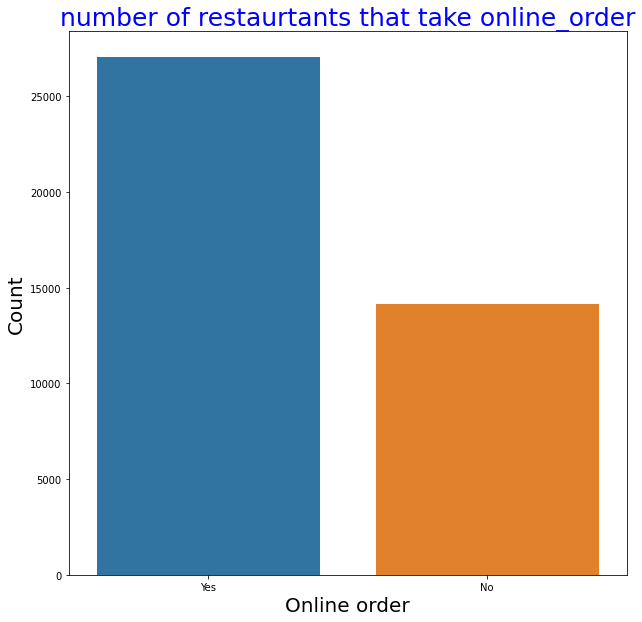

In [27]:
plt.figure(figsize=(10,10))

sns.countplot(df['online_order'])
plt.title("number of restaurtants that take online_order",fontsize=25,color='blue')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Online order",fontsize=20)
plt.show()

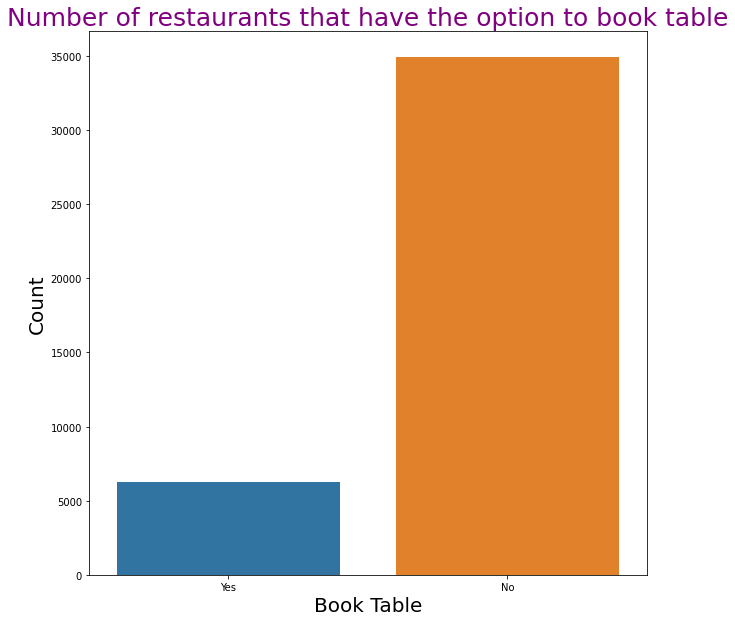

In [28]:
plt.figure(figsize=(10,10))

sns.countplot(df['book_table'])
plt.title("Number of restaurants that have the option to book table",fontsize=25,color='purple')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Book Table",fontsize=20)
plt.show()

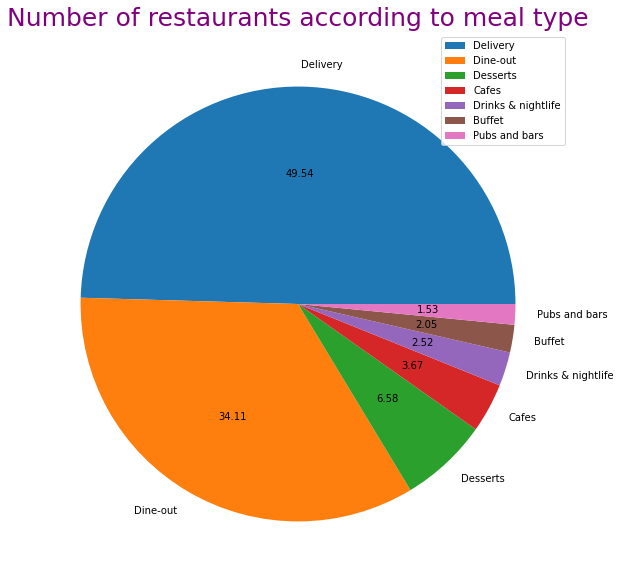

In [29]:
plt.figure(figsize=(10,10))
ax =df.meal_type.value_counts()
labels=df['meal_type'].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Number of restaurants according to meal type",fontsize=25,color='purple')
plt.legend()
plt.show()

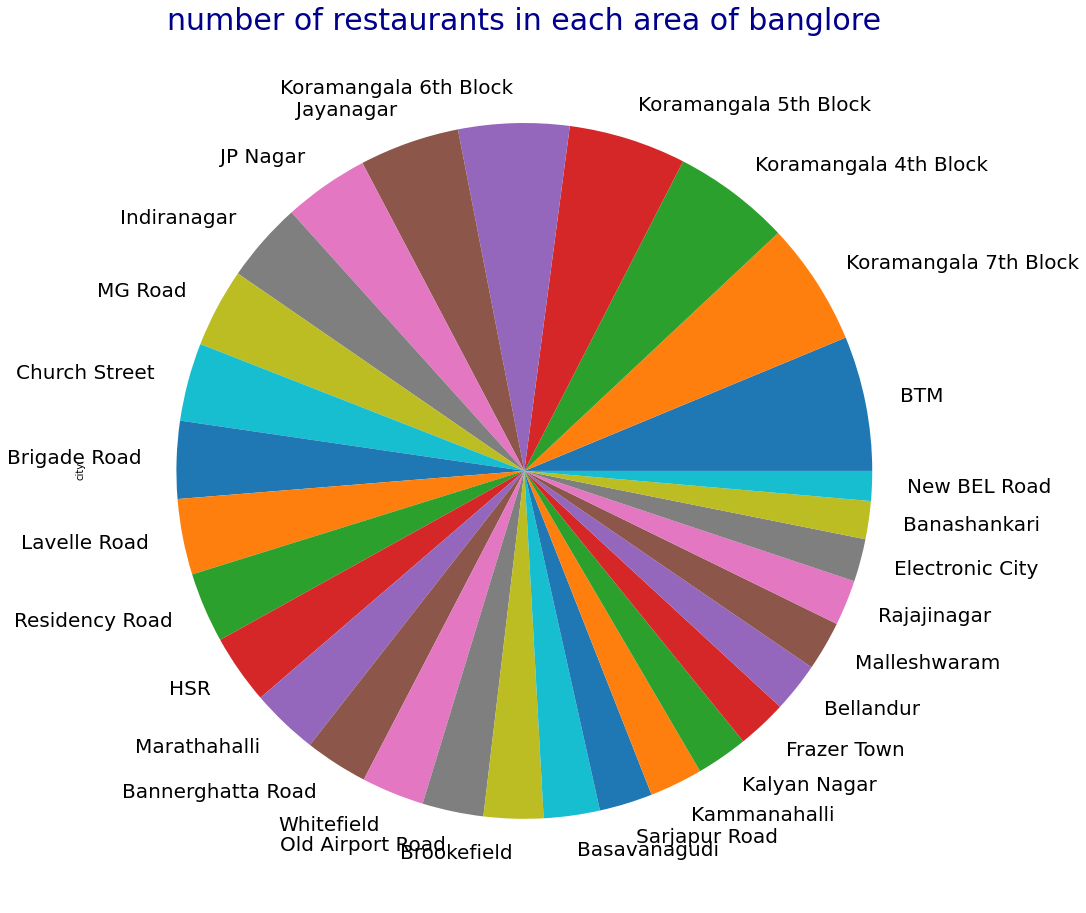

In [30]:
plt.figure(figsize=(16,16))

ax=df.city.value_counts()
ax.plot(kind='pie',fontsize=20)

plt.title('number of restaurants in each area of banglore',fontsize=30,color='darkblue')
plt.show()

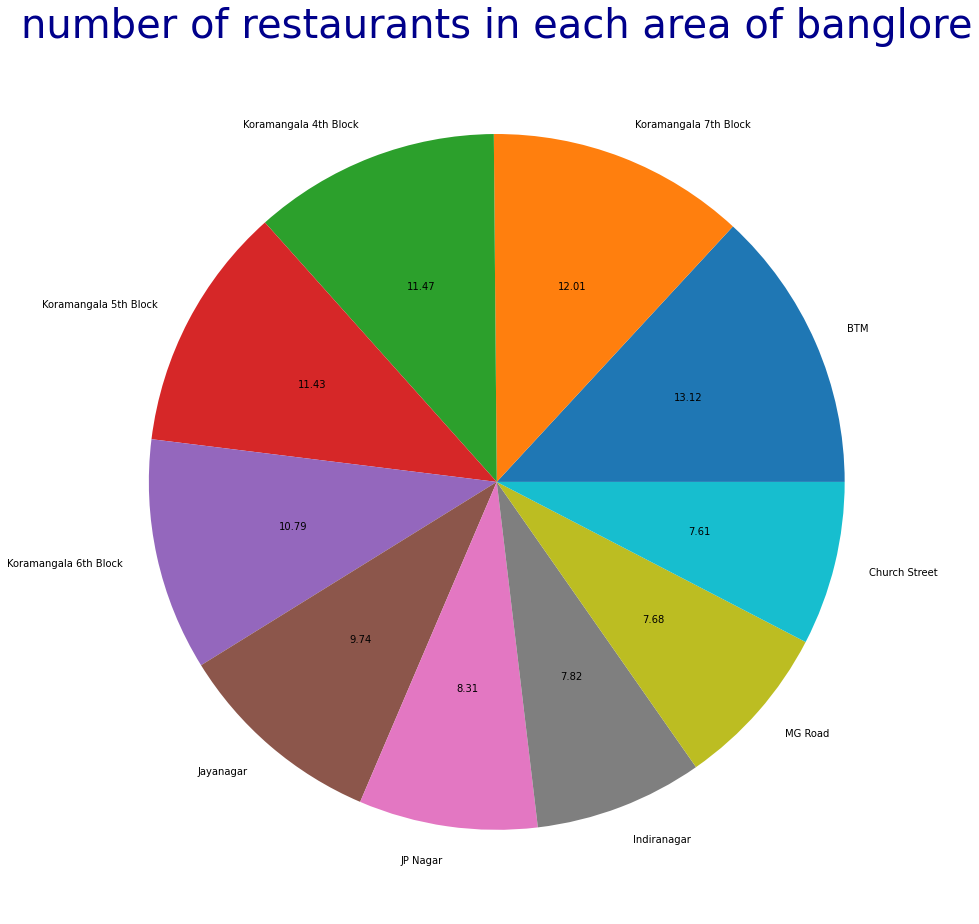

In [31]:
plt.figure(figsize=(16,16))

ax=df.city.value_counts()[:10]
labels=df['city'].value_counts()[:10].index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title('number of restaurants in each area of banglore',fontsize=40,color='darkblue')
plt.show()

<AxesSubplot:>

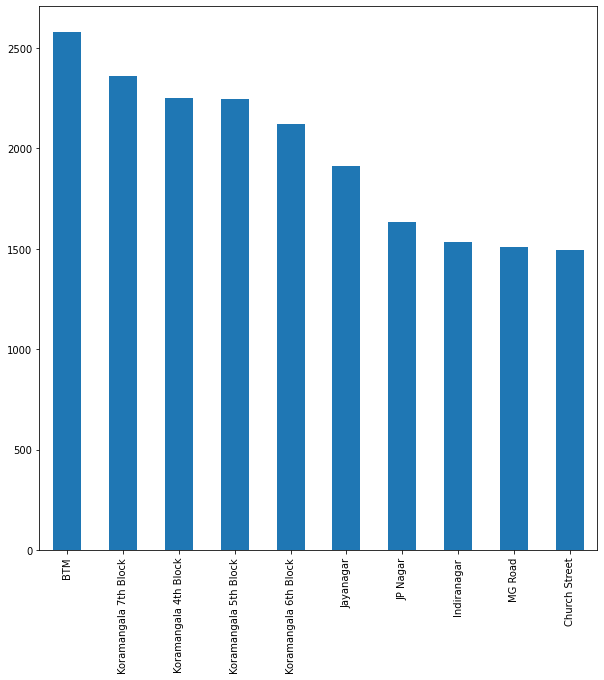

In [32]:
plt.figure(figsize=(10,10))
ax=df.city.value_counts()[:10]
ax.plot(kind='bar')

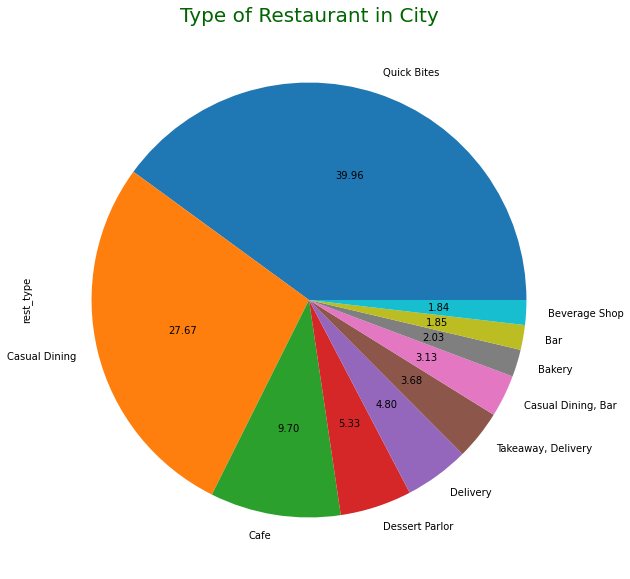

In [33]:
plt.figure(figsize=(10,10))

ax=df.rest_type.value_counts()[:10]
label=df['rest_type'].value_counts()[:10].index
ax.plot(kind='pie',labels=label,autopct='%.2f')

plt.title("Type of Restaurant in City",fontsize=20,color='darkgreen')
plt.show()

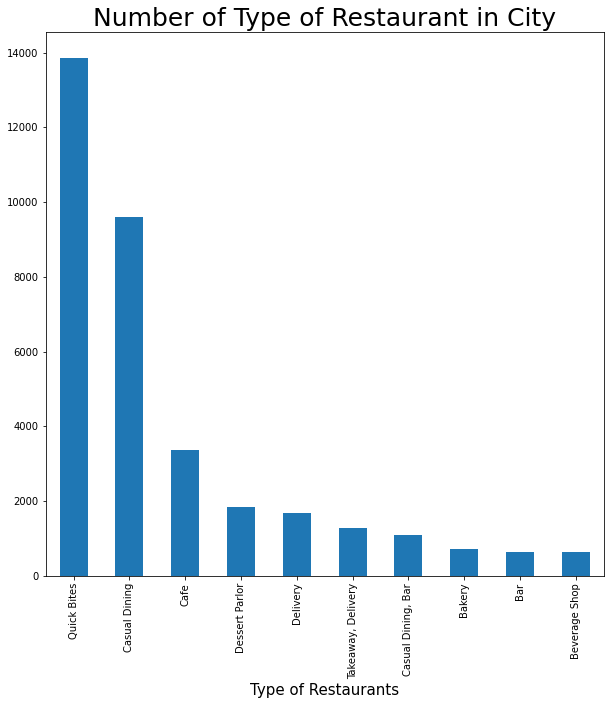

In [34]:
plt.figure(figsize=(10,10))

ax=df.rest_type.value_counts()[:10]
ax.plot(kind='bar')

plt.title("Number of Type of Restaurant in City",fontsize=25)
plt.xlabel("Type of Restaurants",fontsize=15)
plt.show()

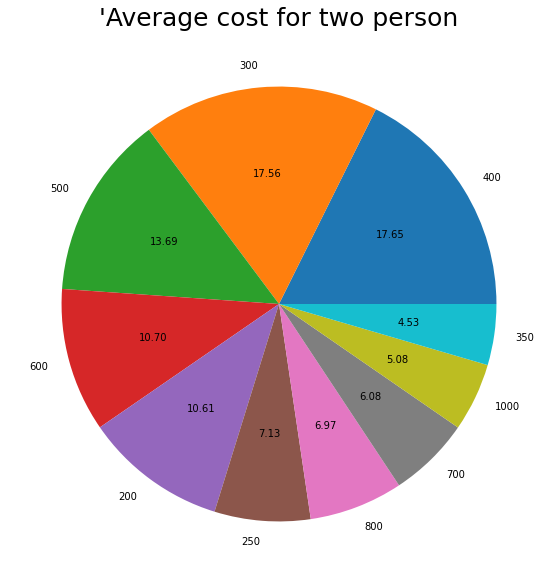

In [35]:
plt.figure(figsize=(10,10))

ax=df.avg_cost.value_counts()[:10]
label=df['avg_cost'].value_counts()[:10].index

plt.pie(ax,labels=label,autopct='%.2f')

plt.title("'Average cost for two person",fontsize=25)
plt.show()

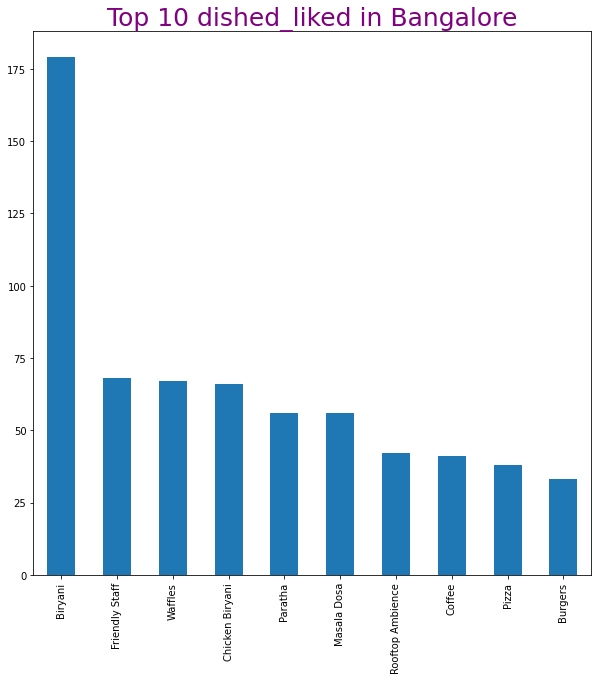

In [36]:
plt.figure(figsize=(10,10))
ax=df['dish_liked'].value_counts()[:10]
ax.plot(kind='bar')
plt.title("Top 10 dished_liked in Bangalore",fontsize=25,color='purple')
plt.show()

In [37]:
df['rate']=df['rate'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41186 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  41186 non-null  object 
 1   book_table    41186 non-null  object 
 2   rate          41186 non-null  float64
 3   votes         41186 non-null  int32  
 4   rest_type     41186 non-null  object 
 5   dish_liked    23218 non-null  object 
 6   cuisines      41186 non-null  object 
 7   avg_cost      41186 non-null  int64  
 8   meal_type     41186 non-null  object 
 9   city          41186 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 4.5+ MB


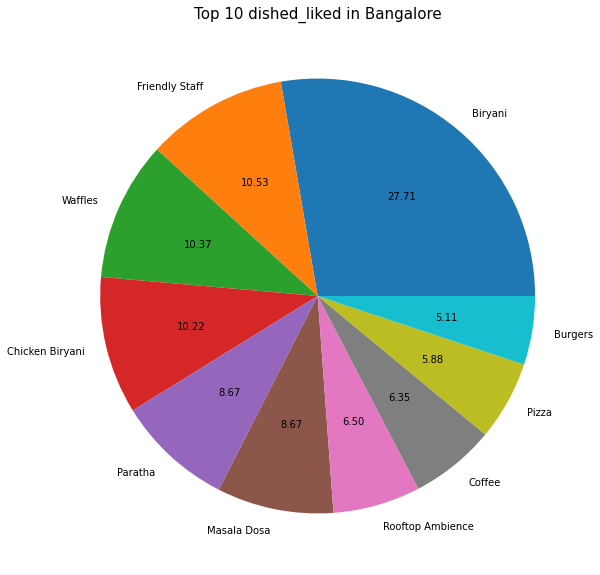

In [38]:
plt.figure(figsize=(10,10))
ax=df.dish_liked.value_counts()[:10]
label=df['dish_liked'].value_counts()[:10].index

plt.pie(ax,labels=label,autopct='%.2f')

plt.title("Top 10 dished_liked in Bangalore",fontsize=15)
plt.show()

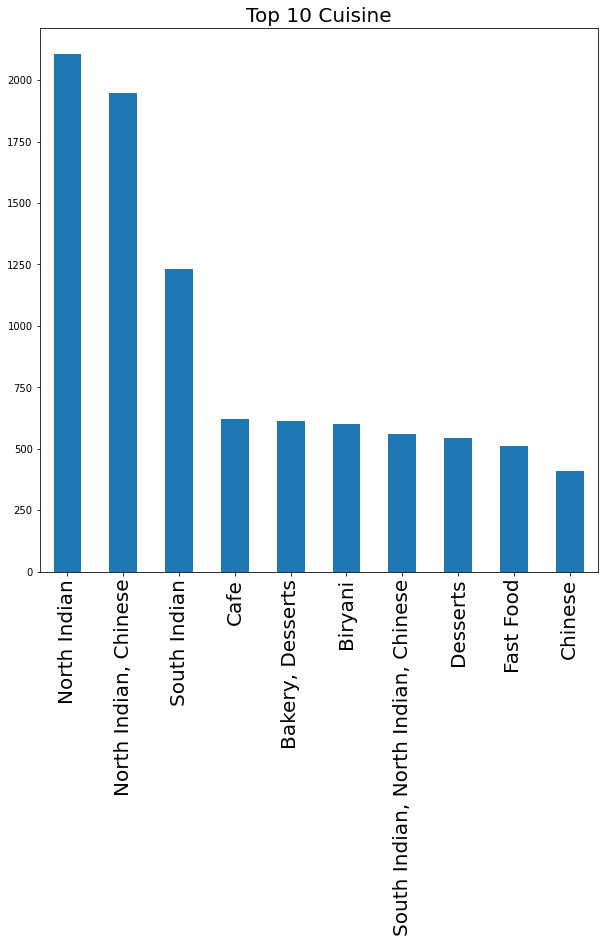

In [39]:
plt.figure(figsize=(10,10))

ax=df.cuisines.value_counts()[:10]
ax.plot(kind='bar')

plt.title("Top 10 Cuisine",fontsize=20)
plt.xticks(fontsize=20)
plt.show()

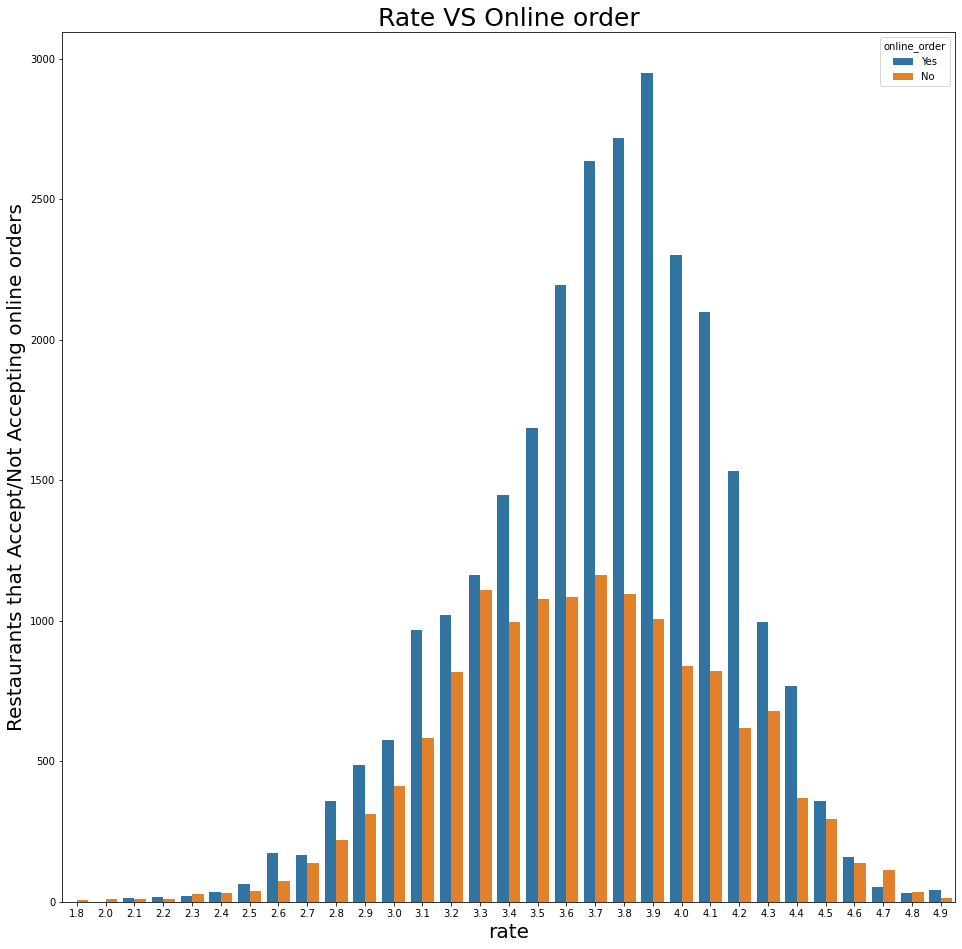

In [40]:
plt.figure(figsize=(16,16))

sns.countplot(x=df['rate'],hue=df['online_order'])
plt.title("Rate VS Online order",fontsize=25)
plt.ylabel("Restaurants that Accept/Not Accepting online orders",fontsize=20)
plt.xlabel("rate",fontsize=20)
plt.show()

#  Data Preprocessing

In [41]:
df=df.drop(['dish_liked','meal_type'],axis=1)

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
list1=['online_order','book_table','rest_type','cuisines','city']
for i in list1:
    df[i]=le.fit_transform(df[i])

df.head()

,online_order,book_table,rate,votes,rest_type,cuisines,avg_cost,city
0,1,1,4.1,775,24,1894,800,1
1,1,0,4.1,787,24,816,800,1
2,1,0,3.8,918,19,653,800,1
3,0,0,3.7,88,73,2221,300,1
4,0,0,3.8,166,24,1921,600,1


# Data Transformation

In [44]:
df.shape

(41186, 8)

In [45]:
#Drop null values
df.dropna(how='any',inplace=True)
df.shape

(41186, 8)

In [46]:
# selecing features
features=df.drop(['rate'],axis=1)
features.shape

(41186, 7)

In [47]:
# selecting Class/ Label
label=df['rate'].values
label

array([4.1, 4.1, 3.8, ..., 3.6, 4.3, 3.4])

In [48]:
features.dtypes

online_order    int64
book_table      int64
votes           int32
rest_type       int64
cuisines        int64
avg_cost        int64
city            int64
dtype: object

In [49]:
label.dtype

dtype('float64')

# Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [51]:
features=StandardScaler().fit(features).transform(features)
features

array([[ 7.23174887e-01,  2.35870854e+00,  4.78673339e-01, ...,
         1.02124903e+00,  4.22720320e-01, -1.60186763e+00],
       [ 7.23174887e-01, -4.23960817e-01,  4.92255868e-01, ...,
        -5.85764669e-01,  4.22720320e-01, -1.60186763e+00],
       [ 7.23174887e-01, -4.23960817e-01,  6.40531810e-01, ...,
        -8.28754681e-01,  4.22720320e-01, -1.60186763e+00],
       ...,
       [-1.38279138e+00, -4.23960817e-01, -3.67970968e-01, ...,
        -5.11227855e-01,  1.92921876e+00,  1.78075343e+00],
       [-1.38279138e+00,  2.35870854e+00, -1.31408588e-01, ...,
        -2.88678585e-03,  4.08135938e+00,  1.78075343e+00],
       [-1.38279138e+00, -4.23960817e-01, -3.83817252e-01, ...,
         3.28908847e-02,  1.92921876e+00,  1.78075343e+00]])

# Split the data

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.10,random_state=42)

In [53]:
# Check the shape of splited data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37067, 7)
(4119, 7)
(37067,)
(4119,)


# 1. Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg

LinearRegression()

In [55]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [56]:
print(lin_reg.score(X_train,y_train))
print(lin_reg.score(X_test,y_test))

0.2991255886457904
0.28825158588204114


In [57]:
lin_reg_pred=lin_reg.predict(X_test)

In [58]:
pd.DataFrame({'Acutual_data':y_test,'New_data':lin_reg_pred})

,Acutual_data,New_data
0,3.8,3.666528
1,4.1,3.785104
2,3.5,3.573993
3,4.2,4.125008
4,3.4,3.576501
...,...,...
4114,3.7,3.475839
4115,4.2,3.557569
4116,3.3,3.578533
4117,3.9,3.549364


In [59]:
from sklearn.metrics import r2_score
lin_reg_score=r2_score(y_test,lin_reg_pred)*100
print("Accuracy score for LR :",lin_reg_score)

Accuracy score for LR : 28.825158588204115


#  Ridge Regression

In [60]:
from sklearn.linear_model import Ridge
rr=Ridge()
rr

Ridge()

In [61]:
rr.fit(X_train,y_train)

Ridge()

In [62]:
print(rr.score(X_train,y_train))
print(rr.score(X_test,y_test))

0.29912558856654115
0.2882513595932411


In [63]:
rr_pred=rr.predict(X_test)

In [64]:
pd.DataFrame({'Acutual_data':y_test,'New_data':rr_pred})

,Acutual_data,New_data
0,3.8,3.666528
1,4.1,3.785103
2,3.5,3.573996
3,4.2,4.125002
4,3.4,3.576501
...,...,...
4114,3.7,3.475843
4115,4.2,3.557570
4116,3.3,3.578537
4117,3.9,3.549365


In [65]:
from sklearn.metrics import r2_score
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)

Accuracy score for RidgeR : 28.82513595932411


# Lasso

In [66]:
from sklearn.linear_model import Lasso
lr=Lasso()
lr

Lasso()

In [67]:
lr.fit(X_train,y_train)

Lasso()

In [68]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.0
-0.0005123426480451165


In [69]:
lr_pred=lr.predict(X_test)

In [70]:
pd.DataFrame({'Acutual_data':y_test,'New_data':lr_pred})

,Acutual_data,New_data
0,3.8,3.70276
1,4.1,3.70276
2,3.5,3.70276
3,4.2,3.70276
4,3.4,3.70276
...,...,...
4114,3.7,3.70276
4115,4.2,3.70276
4116,3.3,3.70276
4117,3.9,3.70276


In [71]:
from sklearn.metrics import r2_score

lr_score=r2_score(y_test,lr_pred)*100
print("Accuracy score for Lasso :",lr_score)

Accuracy score for Lasso : -0.05123426480451165


# Random Forest Regressor

In [72]:
rfr=RandomForestRegressor()
rfr

RandomForestRegressor()

In [73]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9880258258897802
0.9159184063331949


In [75]:
rfr_pred=rfr.predict(X_test)

In [76]:
pd.DataFrame({'Acutual_data':y_test,'New_data':rfr_pred})

,Acutual_data,New_data
0,3.8,3.7730
1,4.1,4.1000
2,3.5,3.4980
3,4.2,4.2000
4,3.4,3.3905
...,...,...
4114,3.7,3.6890
4115,4.2,4.1690
4116,3.3,3.3960
4117,3.9,3.8500


In [77]:
from sklearn.metrics import r2_score

rfr_score=r2_score(y_test,rfr_pred)*100
print("Accuracy score for RandomForest :",rfr_score)

Accuracy score for RandomForest : 91.59184063331949


# Support Vector Regression

In [78]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [79]:
print(svr.score(X_train,y_train))
print(svr.score(X_test,y_test))

0.45423622042063316
0.43312333545877146


In [80]:
svr_pred=svr.predict(X_test)

In [81]:
pd.DataFrame({'Acutual_data':y_test,'New_data':svr_pred})

,Acutual_data,New_data
0,3.8,3.552949
1,4.1,4.112135
2,3.5,3.535447
3,4.2,4.139089
4,3.4,3.532336
...,...,...
4114,3.7,3.495102
4115,4.2,3.613246
4116,3.3,3.544256
4117,3.9,3.633799


In [82]:
from sklearn.metrics import r2_score

svr_score=r2_score(y_test,svr_pred)*100
print("Accuracy score for SVR :",svr_score)

Accuracy score for SVR : 43.312333545877145


In [83]:
pd.DataFrame({"Model Names":['Linear Reg','Ridge Reg','Lasso Reg','RandomForest Reg','Support Vector Reg'],
            "Accuracy socre":[lin_reg_score,rr_score,lr_score,rfr_score,svr_score]})

,Model Names,Accuracy socre
0,Linear Reg,28.825159
1,Ridge Reg,28.825136
2,Lasso Reg,-0.051234
3,RandomForest Reg,91.591841
4,Support Vector Reg,43.312334


In [84]:
rfr.predict([[1,0,13,73,1900,350,27]])

array([4.424])

In [85]:
sample=pd.DataFrame({"Actual Ratin":y_test,
             "Predicted Rating":np.round(rfr_pred,2)})
sample

,Actual Ratin,Predicted Rating
0,3.8,3.77
1,4.1,4.10
2,3.5,3.50
3,4.2,4.20
4,3.4,3.39
...,...,...
4114,3.7,3.69
4115,4.2,4.17
4116,3.3,3.40
4117,3.9,3.85


In [ ]:
sample.to_csv("Model_Prediction_Sample.csv",index=False)